In [1]:
from IPython.display import display, HTML
display(HTML("<style>.container { width:95% !important; }</style>"))

# U ovom jupyter notebooku modeliramo spektralne linije! 

### Analiziracemo jedan semi-empirijski model atmosfere - i izracunati neke spektralne linije.

### Krenucemo prvo od Milne-Eddington atmosfere, da se malo upoznamo sa linijama

### A onda cemo iskoristiti FALC modelom atmosfere da izmodeliramo malo detaljnije neke spektralne linije.

### Paznja: Mi ovde ne modeliramo neke >>stvarne<< spektralne linije, vec kao neke "toy modele" 

### Model atmosfere je u stvari niz vrednosti koji opisuje kako fizicki parametri zavise od visine (odnosno optičke dubine)

### Uskoro ćemo videti šta ovaj naš model sadrži ali u principu najvažnija dva parametra su Temperatura i pritisak gasa. 


#### Koristimo model atmosfere u fajlu falc_71.dat

#### Potrebne su nam prve cetiri kolone. To su:
#### 0 - logaritam opticke dubine
#### 1 - visina u cm 
#### 2 - temperatura u K
#### 3 - pritisak gasa u dyn / cm^2
#### 4 - kontrole radi, imamo i pritisak elektrona u dyn / cm^2 (mozda cemo ovo i iskoristiti za nesto)

In [2]:
import numpy as np
import matplotlib.pyplot as plt 

### Pre nego sto se bacimo na racunanje linije u "stvarnom" modelu atmosfere. Hajde da se pozabavimo necim jednostavnijim:

### Funkcija izvora je linearna: $ S = a + b \tau_c$ 

### Neprozracnost u spektralnoj liniji izgleda ovako: $\chi_\lambda = \chi_c ( 1+ \eta \phi_\lambda)$ 

### Gde je $\phi_\lambda$ tzv. apsorpcioni profile

### Iz ovoga sledi da je $\tau_\lambda = \tau_c (1 + \eta \phi_\lambda)$ 

### Izveli smo da je izlazni intenzitet, tj spektar ove spektralne linije ovakav: $I_\lambda = a + \frac{b}{1+ \eta \phi_\lambda}$

In [5]:
# Hajde da iskodiramo ovo gore i da vidimo kako izgleda spektar jedne spektralne linije. 

# Hajde da se prvo pozabavimo apsorpcionim profilom 

# Prva aproksimacija (ako bude vremena napravicemo jos komplikovanijim) je da je ovo neki doplerov profil

llambda0 = 656.3 # u nm, ali nije da je bitno, za sada
#delta_l_d =? # hajde da ovo izracunamo preko neke temperature

# delta_l_d = sqrt(2kT/m) / c * llambda0

k = 1.38E-23
T = 6000
m = 1.67E-27 # Ovo je za vodonik

v_sr = np.sqrt(2*k*T/m)

In [6]:
v_sr  # ovo ce biti u m/s

9957.9956139128

In [8]:
delta_l_d = v_sr / 3E8 * llambda0 # u nm
print(delta_l_d)
# Setimo se da ovo delva_lambda_d je i dalje u nm

0.021784775071369902


In [10]:
llambda = np.linspace(-0.4,0.4,401) + llambda0
#print (llambda)

In [11]:
phi_lambda = np.exp(-(llambda-llambda0)**2.0 / delta_l_d ** 2.0)

Text(0, 0.5, 'Apsorpcioni profil')

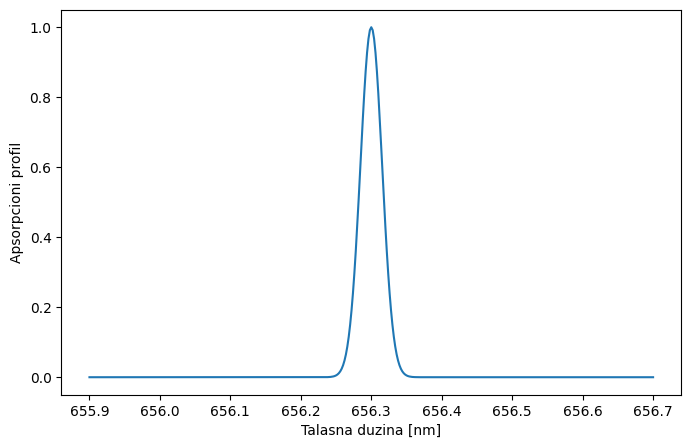

In [12]:
# Hajde da isplotujemo nas aps. profil:
plt.figure(figsize=[8,5])
plt.plot(llambda, phi_lambda)
plt.xlabel("Talasna duzina [nm]")
plt.ylabel("Apsorpcioni profil")

In [13]:
# Hajde da umesto Gausijana iskoristimo Voigt-of profil, da vidimo koliko krila linije mogu da budu vazna
from scipy.special import wofz
def voigt_profile(lambda_array, lambda_0, Delta_lambda_D, a):
    """Compute the Voigt profile at given wavelengths."""
    u = (lambda_array - lambda_0) / Delta_lambda_D
    z = u + 1j * a
    V = np.real(wofz(z)) / (Delta_lambda_D * np.sqrt(np.pi))
    return V/np.max(V)  # Normalize the profile

Text(0, 0.5, 'Apsorpcioni profil')

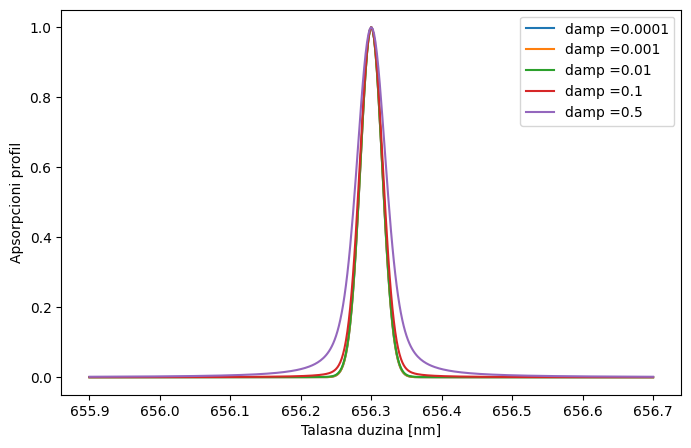

In [16]:
plt.figure(figsize=[8,5])
dampings = [0.0001, 0.001, 0.01, 0.1,0.5]
for damp in dampings:
    phi_lambda = voigt_profile(llambda, llambda0, delta_l_d, damp)
    plt.plot(llambda, phi_lambda, label='damp ='+str(damp))

plt.legend()
plt.xlabel("Talasna duzina [nm]")
plt.ylabel("Apsorpcioni profil")

Text(0, 0.5, 'Apsorpcioni profil')

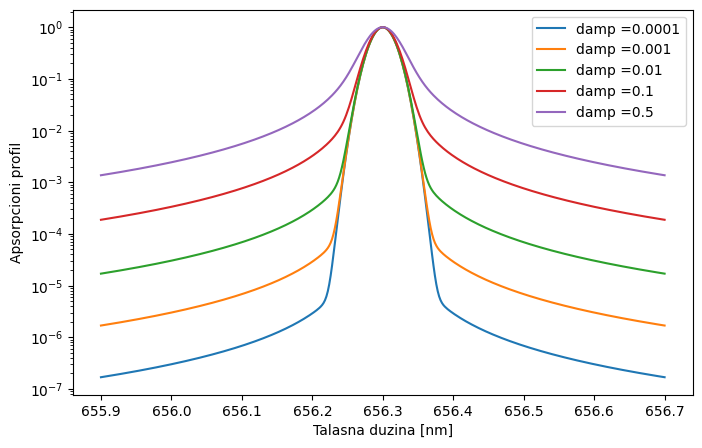

In [17]:
plt.figure(figsize=[8,5])
dampings = [0.0001, 0.001, 0.01, 0.1,0.5]
for damp in dampings:
    phi_lambda = voigt_profile(llambda, llambda0, delta_l_d, damp)
    plt.semilogy(llambda, phi_lambda, label='damp ='+str(damp))

plt.legend()
plt.xlabel("Talasna duzina [nm]")
plt.ylabel("Apsorpcioni profil")

In [18]:
# Mozemo da "resimo" JPZ. (Tj mi smo to vec resili analiticki, posto znamo da je S = a + b tau_c)
a = 0.5 
b = 0.5 
eta = 10.0
damp = 0.001
phi_lambda = voigt_profile(llambda, llambda0, delta_l_d, damp)
I_lambda = a + b /(1.0 + eta * phi_lambda)

Text(0, 0.5, 'Intenzitet [A.J.]')

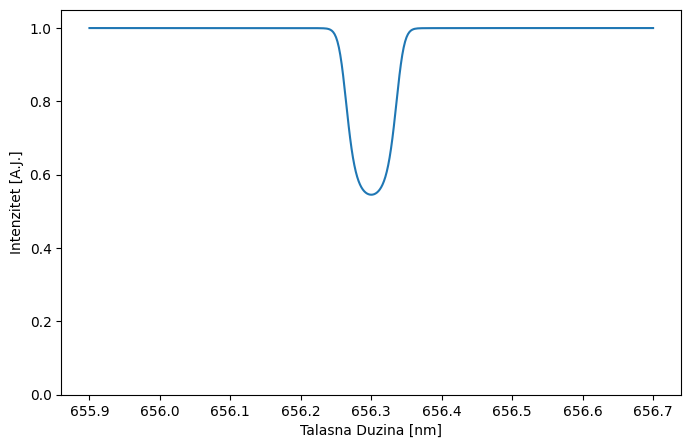

In [20]:
plt.figure(figsize=[8,5])
plt.plot(llambda, I_lambda)
plt.ylim([0,1.05])
plt.xlabel("Talasna Duzina [nm]")
plt.ylabel("Intenzitet [A.J.]") # arbitrarne jedinice, ne astronomske :)

Text(0, 0.5, 'Intenzitet [A.J.]')

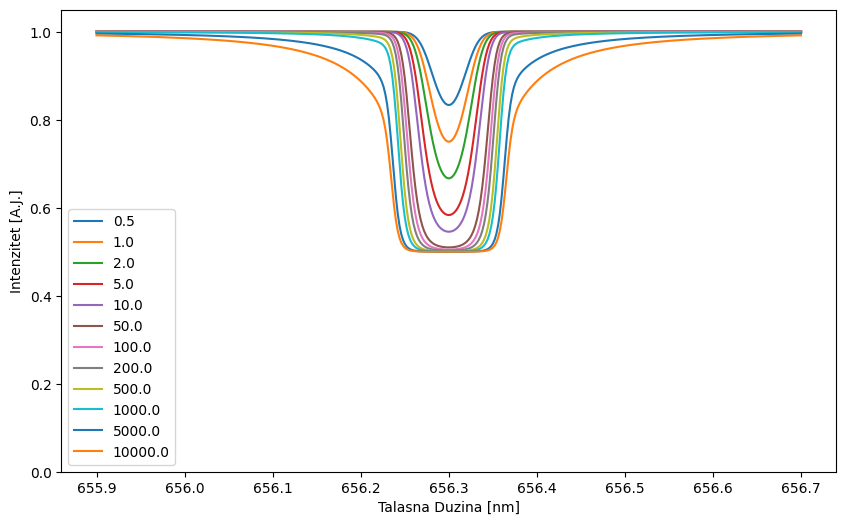

In [23]:
# Hajde da vidimo kako parametar eta utice na jacinu i oblik spektralne linije:

eta = np.array([0.5,1.0,2.0,5.0,10.,50.,100.,200.,500.,1000.,5000.,10000.])

plt.figure(figsize=[10,6])

for i in range(0,len(eta)):
    
    phi_lambda = voigt_profile(llambda, llambda0, delta_l_d, damp)
    I_lambda = a + b /(1.0 + eta[i] * phi_lambda)
    
    plt.plot(llambda, I_lambda, label=str(eta[i]))

plt.legend()
plt.ylim([0,1.05])
plt.xlabel("Talasna Duzina [nm]")
plt.ylabel("Intenzitet [A.J.]") # arbitrarne jedinice, ne astronomske :)

Text(0, 0.5, 'Intenzitet [A.J.]')

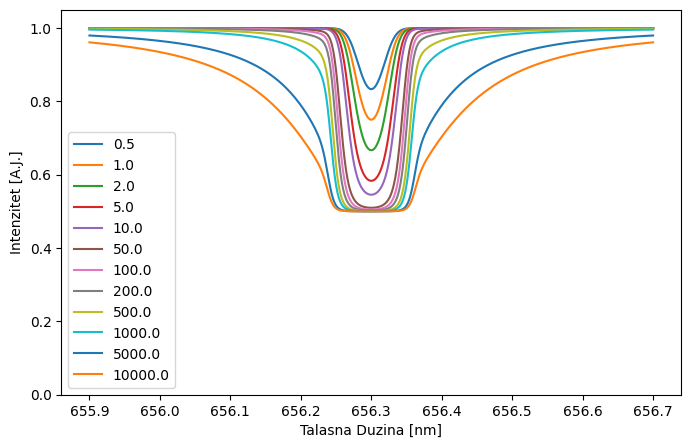

In [27]:
# Damping moze da bude jako jako vazan za oblik spektralne linije, posebno u krilima linije.
# Probacemo sada jedan primer sa vecim dampingom:

# Hajde da vidimo kako parametar eta utice na jacinu i oblik spektralne linije:

eta = np.array([0.5,1.0,2.0,5.0,10.,50.,100.,200.,500.,1000.,5000.,10000.])
damp = 0.005

plt.figure(figsize=[8,5])

for i in range(0,len(eta)):
    
    phi_lambda = voigt_profile(llambda, llambda0, delta_l_d, damp)
    I_lambda = a + b /(1.0 + eta[i] * phi_lambda)
    
    plt.plot(llambda, I_lambda, label=str(eta[i]))

plt.legend()
plt.ylim([0,1.05])
plt.xlabel("Talasna Duzina [nm]")
plt.ylabel("Intenzitet [A.J.]") # arbitrarne jedinice, ne astronomske :)

Text(0, 0.5, 'Intenzitet [A.J.]')

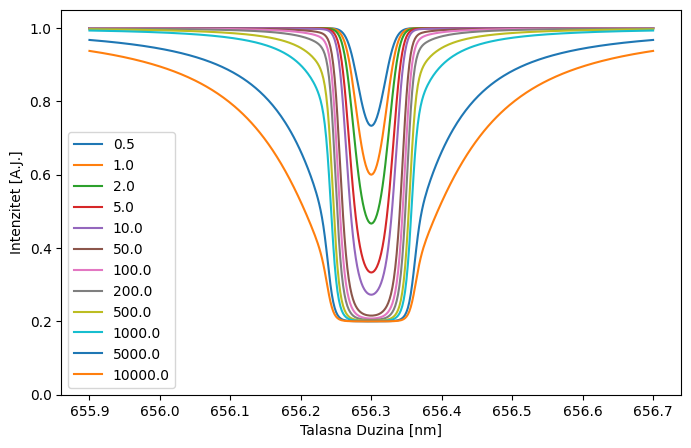

In [28]:
# Damping moze da bude jako jako vazan za oblik spektralne linije, posebno u krilima linije.
# Probacemo sada jedan primer sa vecim dampingom:

# Hajde da vidimo kako parametar eta utice na jacinu i oblik spektralne linije:

a = 0.2
b = 0.8

eta = np.array([0.5,1.0,2.0,5.0,10.,50.,100.,200.,500.,1000.,5000.,10000.])
damp = 0.005

plt.figure(figsize=[8,5])

for i in range(0,len(eta)):
    
    phi_lambda = voigt_profile(llambda, llambda0, delta_l_d, damp)
    I_lambda = a + b /(1.0 + eta[i] * phi_lambda)
    
    plt.plot(llambda, I_lambda, label=str(eta[i]))

plt.legend()
plt.ylim([0,1.05])
plt.xlabel("Talasna Duzina [nm]")
plt.ylabel("Intenzitet [A.J.]") # arbitrarne jedinice, ne astronomske :)

## Zaključci koje smo ovde izveli:

### - Oblik linije i njena ekvivalentna širina se ne menjaju linearno sa eta - postoji neka saturacija
### - Ekvivalentna širina, a i dubina linije zavise od eta, ali i od a i b. 

### - Generalno, "strmiji" nagib funkcije izvora vodi ka dubljim spektralnim linijama.

# Komplikovaniji slucaj: Izracunajte funkciju izvora iz FALC modela Sunčeve atmosfere, 
# pa za liniju koju ste isto ovako parametrizovali, izračunajte spektar numerički! 

In [29]:
atmos = np.loadtxt("falc_71.dat", unpack=True, skiprows=1)

In [30]:
atmos.shape

(12, 71)

In [31]:
logtau = np.copy(atmos[0]) # bezdimenziono
h = np.copy(atmos[1]) / 1E5 # u km -> ovo nam sada nece trebati
T = np.copy(atmos[2]) # u K  
pg = np.copy(atmos[3]) # u dyn / cm^2 -> ovo nam sada nece trebati takodje

Text(0.5, 1.0, 'Temperatura u FALC modelu atmosfere')

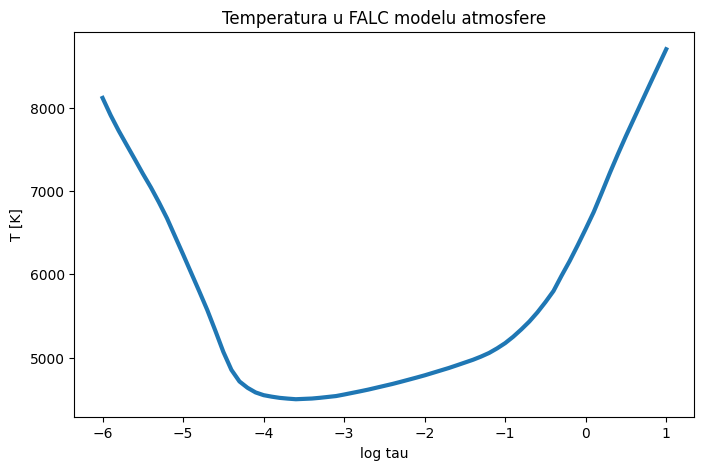

In [32]:
plt.figure(figsize=[8,5])
plt.plot(logtau,T, linewidth=3)
plt.xlabel("log tau")
plt.ylabel("T [K]")
plt.title("Temperatura u FALC modelu atmosfere")

In [31]:
# Sledeci zadatak nam je da izracunamo funkciju izvora za ovu spektralnu liniju

# Imamo temperaturu, T

# i imamo talasnu duzinu u centru linije, llambda 0 

# Najbolje sto mozemo je da pp da spektralna nastaje u LTR 

# Onda je funkcija izvora jednaka plankovoj funkciji:

# Necu sada da vas ubedjujem da nema potrebe da racunamo S pojedinacno za svaku talasnu duzinu - proverite sami ako sumnjate

In [33]:
def Planck(llambda, T):
    """Compute the Planck function at given wavelength and temperature."""
    h = 6.626E-34  # Planck constant in J*s
    c = 3.0E8      # Speed of light in m/s
    k = 1.38E-23   # Boltzmann constant in J/K
    
    lambda_m = llambda * 1E-9  # Convert nm to m
    B_lambda = (2.0 * h * c**2) / (lambda_m**5) / (np.exp((h * c) / (lambda_m * k * T)) - 1.0)
    return B_lambda

Text(0.5, 1.0, 'Funkcija izvora u LTR na 656.3 nm u FALC modelu atmosfere')

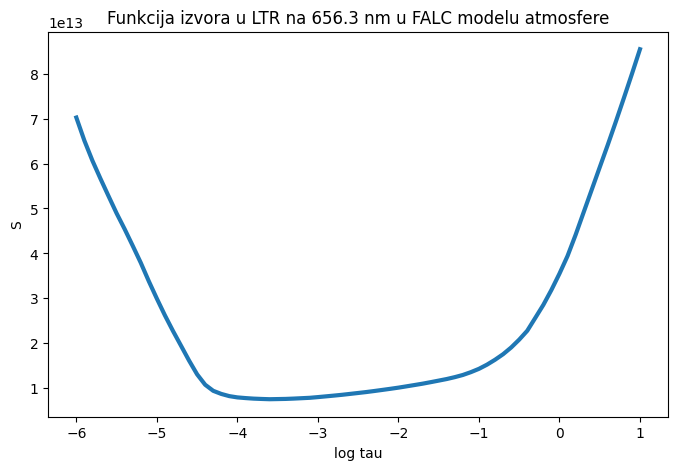

In [34]:
S = Planck(llambda0, T)  # u W/m2/sr/m
plt.figure(figsize=[8,5])
plt.plot(logtau,S, linewidth=3)
plt.xlabel("log tau")
plt.ylabel("S")
plt.title("Funkcija izvora u LTR na 656.3 nm u FALC modelu atmosfere")

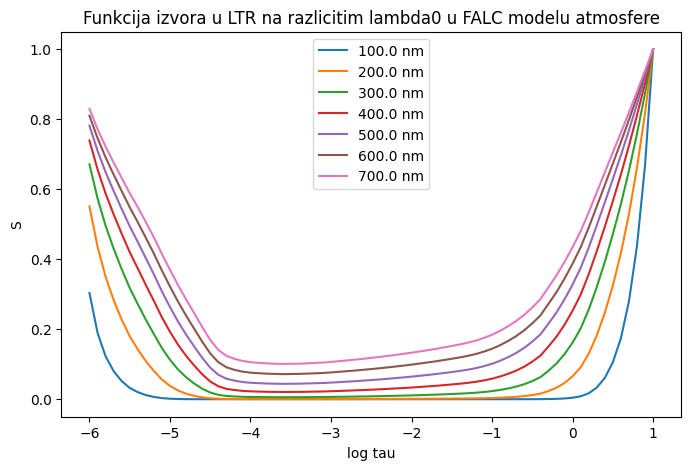

In [38]:
# Ponovimo isto za razlicite talasne duzine u vidljivom telu spektra.
llambda0vals = np.linspace(100.0,700.0,7)  # od 400 do 700 nm, 7 tacaka
plt.figure(figsize=[8,5])
for llambda0 in llambda0vals:
    S = Planck(llambda0, T)  # u W/m2/sr/m
    plt.plot(logtau,S/np.max(S), linewidth=1.5, label=str(round(llambda0,1))+" nm")
plt.xlabel("log tau")
plt.ylabel("S")
plt.title("Funkcija izvora u LTR na razlicitim lambda0 u FALC modelu atmosfere")
plt.legend()


In [40]:
# Imamo funkciju izvora - jedan deo posla je gotov. 

# Hajde da napravimo opticku dubinu u liniji. Za to cemo da iskoristimo istu aproksimaciju kao sto smo imali gore: 

# tau_lambda = tau_c (1+eta * phi)
# Mejdutim profil linije sada zavisi od dubine.

tau_c = 10.**logtau
ND = len(tau_c)
eta = np.ones(ND) * 200.0
damping = np.ones(ND) * 0.005

# Delta_lambda_D sada hocemo da eksplicitno zavisi od temperature u atmosferi
v_sr = np.sqrt(2*k*T/m)
delta_l_d = v_sr / 3E8 * llambda0 # u nm

llambda0 = 656.3
llambda = np.linspace(-0.4,0.4,401) + llambda0

phi_lambda = np.zeros((ND, len(llambda)))

for d in range(0,ND):
    phi_lambda[d] = voigt_profile(llambda, llambda0, delta_l_d[d], damping[d])

#llambda0 = 656.3
#delta_l_d = 
#tau_llambda = tau_c[:,None] * (1.0 + eta * phi_lambda[None,:])

In [44]:
# Pazljivo! Sada moramo da uzmemo u obzir da eta i phi zavise od dubine, pa cemo da razbijemo opticku dubinu na slojeve, odredimo
# zavisnost od talasne duzine, saberemo slojeve nazad i to posle koristimo za resenje JPZ.

delta_tau_lambda = np.zeros((ND, len(llambda)))
delta_tau = np.zeros(ND)
delta_tau[0] = 0.0

for d in range(1,ND):
    
    delta_tau_c = tau_c[d] - tau_c[d-1]

    delta_tau_lambda[d] = delta_tau_c * (1.0 + eta[d] * phi_lambda[d])

tau_llambda = np.cumsum(delta_tau_lambda, axis=0)

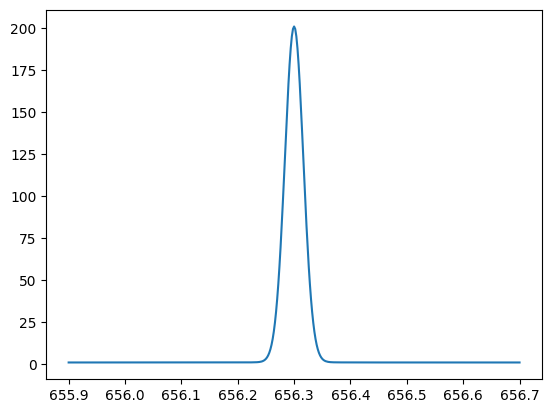

In [45]:
# Hajde da vizualizujemo zavisnost od talasne duzine:

plt.plot(llambda, tau_llambda[60,:])

## Kako sada da dobijemo spektar? 

## Pa, za svaku talasnu duzinu, treba da resimo JPZ: 

## $I_\lambda = \int_0^{\infty} S(\tau_\lambda) e^{-\tau_\lambda} d \tau_\lambda$

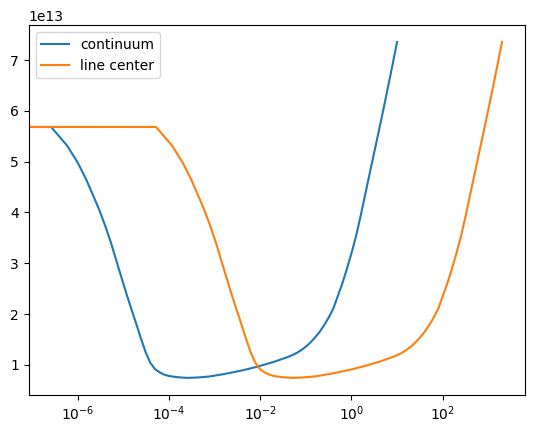

In [48]:
# Hajde da uporedimo S ( tau_lambda) na dva razlicita lambda:

plt.semilogx(tau_llambda[:,0], S, label='continuum')
plt.semilogx(tau_llambda[:,200], S, label='line center')
plt.legend()

## Da resimo ovaj gore integral, koristicemo numericko resenje JPZ koje smo napisali na vezbama #6:

In [49]:
def formal_solution(tau, S, mu):
    
    ND = len(tau)
    I = np.zeros(ND)
    
    step = -1
    start = ND-1
    end = 0
    I[start] = S[start]
    
    
    if (mu < 0):
        step = 1
        start = 0 
        end = ND -1
        I[0] = 0.0
        
    for i in range(start+step, end+step, step):
        
        
        
        S_mean = (S[i] + S[i-step]) * 0.5
        
        delta = (tau[i-step] - tau[i]) / mu 
        
        #print (i, delta)
        
        I[i] = I[i-step] * np.exp(-delta) + S_mean * (1.0 - np.exp(-delta))
        
        
    return I
        

In [50]:
## Kako se racuna spektar? Za svaku talasnu duzinu, tj. za svako tau_lambda i S_lambda (S_lambda ne zavisi od lambda, ali ok):
## Izracunamo intenzitet, i uzmemo izlazni intenzitet i spakujemo u niz

spektar = np.zeros(len(llambda))

for i in range(0,len(spektar)):
    
    # resi mi jednacinu prenosa za tu talasnu duzinu:
    
    I_temp = formal_solution(tau_llambda[:,i], S, mu=1.0)
    
    spektar[i] = I_temp[0]

Text(0, 0.5, 'Intenzitet [SI]')

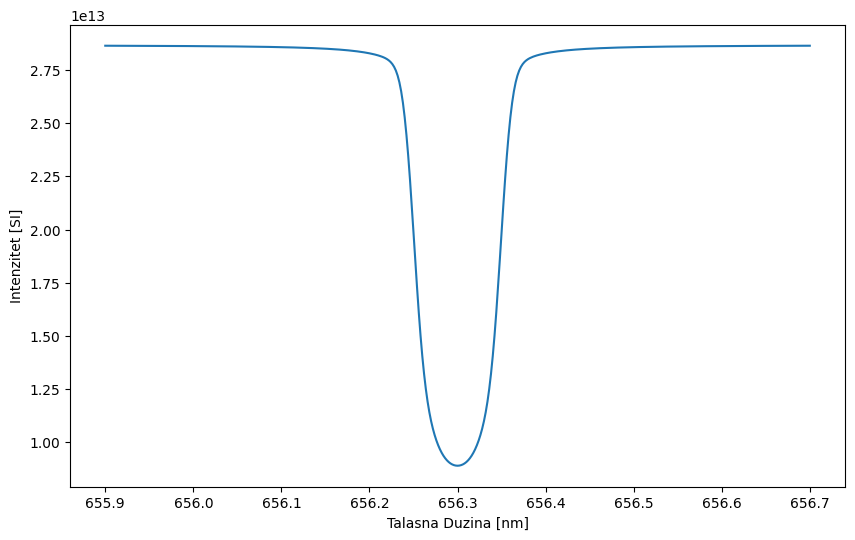

In [51]:
plt.figure(figsize=[10,6])
plt.plot(llambda, spektar)
plt.xlabel("Talasna Duzina [nm]")
plt.ylabel("Intenzitet [SI]") 

Text(0.5, 1.0, 'Funkcija izvora u LTR na 656.3 nm u FALC modelu atmosfere')

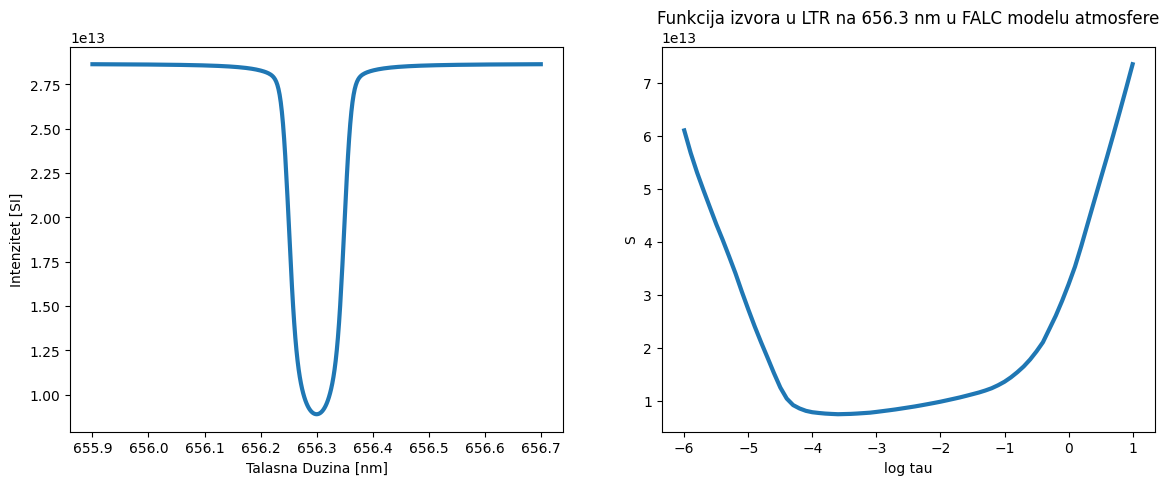

In [52]:
# Da bismo ovo bolje razumeli / analizirali, isplotujmo sa strane funkciju izvora sa optickom dubinom:

plt.figure(figsize=[14,5])
plt.subplot(121)
plt.plot(llambda, spektar, linewidth=3)
plt.xlabel("Talasna Duzina [nm]")
plt.ylabel("Intenzitet [SI]") # arbitrarne jedinice, ne astronomske :)

plt.subplot(122)
plt.plot(logtau,S, linewidth=3)
plt.xlabel("log tau")
plt.ylabel("S")
plt.title("Funkcija izvora u LTR na 656.3 nm u FALC modelu atmosfere")

# Hajde da ispitamo kako sada eta deluje na oblik linije:

In [61]:
def izracunaj_spektar(tau_c, eta, llambda0, damping, T, S, mu, llambda):

    ND = len(tau_c)
    v_sr = np.sqrt(2*k*T/m)
    delta_l_d = v_sr / 3E8 * llambda0 # u nm
    phi_lambda = np.zeros((ND, len(llambda)))
    
    for d in range(0,ND):
        phi_lambda[d] = voigt_profile(llambda, llambda0, delta_l_d[d], damping[d])
    
    delta_tau_lambda = np.zeros((ND, len(llambda)))
    delta_tau = np.zeros(ND)
    delta_tau[0] = 0.0

    for d in range(1,ND):
    
        delta_tau_c = tau_c[d] - tau_c[d-1]
        delta_tau_lambda[d] = delta_tau_c * (1.0 + eta[d] * phi_lambda[d])
    tau_llambda = np.cumsum(delta_tau_lambda, axis=0)
    
    spektar = np.zeros(tau_llambda.shape[1])

    for i in range(0,len(spektar)):
    
    # resi mi jednacinu prenosa za tu talasnu duzinu:
    
        I_temp = formal_solution(tau_llambda[:,i], S, mu=mu)
    
        spektar[i] = I_temp[0]
        
    return spektar

In [62]:
# Isprobamo da li ovo radi:
etas = np.ones(len(logtau)) * 200.0
dampings = np.ones(len(logtau)) * 0.005

I_test = izracunaj_spektar(10.**logtau, etas, llambda0, dampings, T, S, 1.0, llambda)

Text(0, 0.5, 'Intenzitet [SI]')

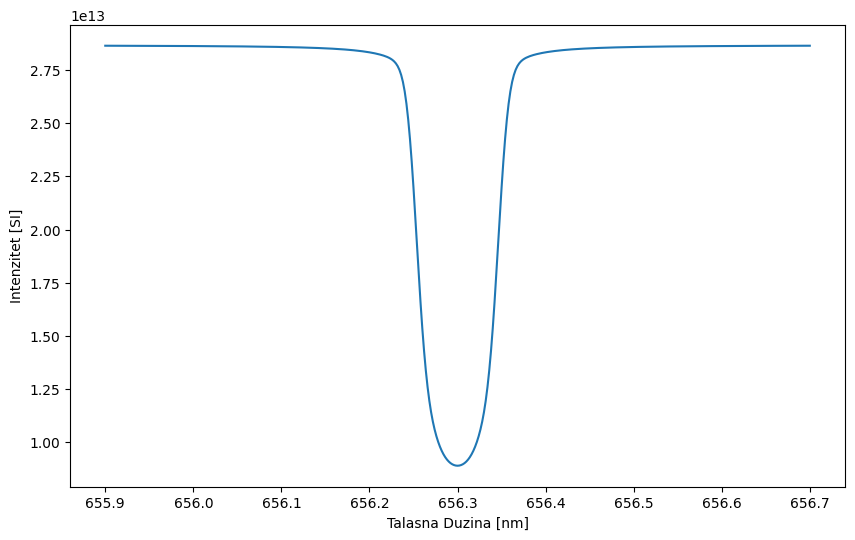

In [57]:
plt.figure(figsize=[10,6])
plt.plot(llambda, I_test)
plt.xlabel("Talasna Duzina [nm]")
plt.ylabel("Intenzitet [SI]") 

Text(0, 0.5, 'Intenzitet [SI]')

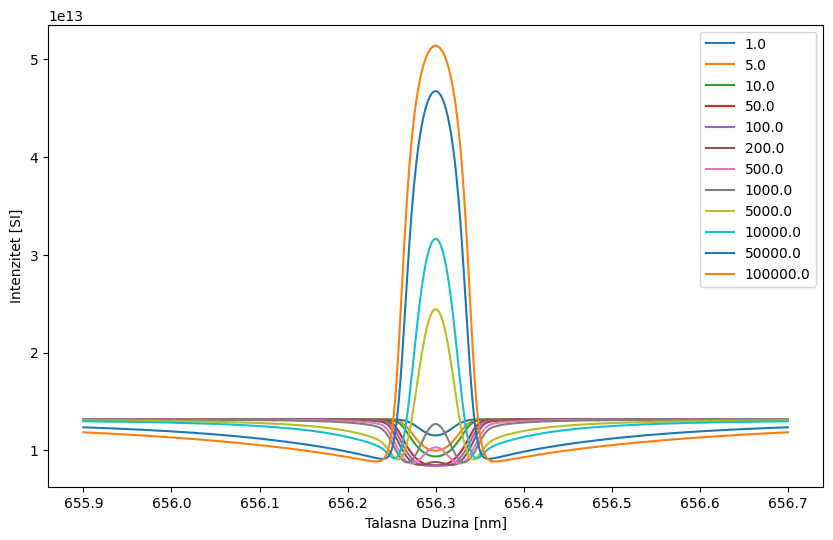

In [63]:
etascale = np.array([1.0,5.0,10.,50.,100.,200.,500.,1000.,5000.,10000.,50000.,100000])

plt.figure(figsize=[10,6])


for i in range(0,len(etascale)):
    
    etas = np.ones(len(logtau)) * etascale[i]
    
    spektar = izracunaj_spektar(10.**logtau, etas, llambda0, dampings, T, S, 0.1, llambda)
    
    plt.plot(llambda, spektar, label = str(etascale[i]))
    
    plt.legend()
        
plt.xlabel("Talasna Duzina [nm]")
plt.ylabel("Intenzitet [SI]")    
   

Text(0.5, 1.0, 'Funkcija izvora u LTR na 656.3 nm u FALC modelu atmosfere')

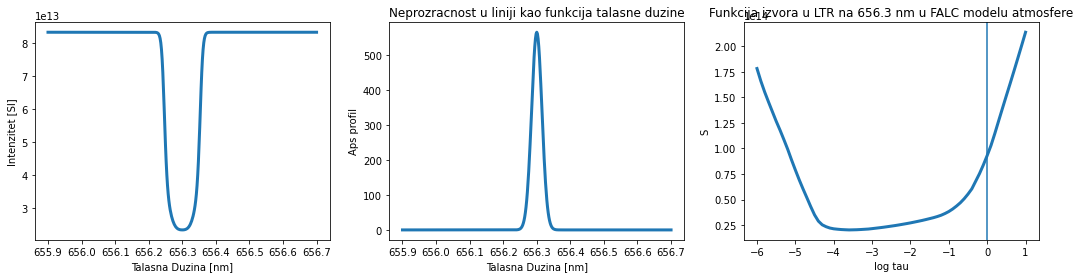

In [61]:
# Da bismo, nadamo se, jos bolje ovo razumeli / analizirali, isplotujmo sa strane funkciju izvora sa optickom dubinom i isplotujmo aps. profil linije

plt.figure(figsize=[18,4])
plt.subplot(131)
plt.plot(llambda, spektar, linewidth=3)
plt.xlabel("Talasna Duzina [nm]")
plt.ylabel("Intenzitet [SI]") # arbitrarne jedinice, ne astronomske :)

plt.subplot(132)
plt.plot(llambda, 1+eta[-1]*phi_lambda, linewidth=3)
plt.xlabel("Talasna Duzina [nm]")
plt.ylabel("Aps profil")
plt.title("Neprozracnost u liniji kao funkcija talasne duzine")

plt.subplot(133)
plt.plot(logtau,S, linewidth=3)
plt.axvline(x=0)
plt.xlabel("log tau")
plt.ylabel("S")
plt.title("Funkcija izvora u LTR na 656.3 nm u FALC modelu atmosfere")

## Sta bismo jos mogli da ispitamo? 

### - Mogli bismo da ovaj Fojtov profil napravimo takvim da a zavisi od visine. 

### - Mogli bismo da menjamo centralnu talasnu duzinu linije: ovo bi uticalo na oblik S(tau), pa samim tim i na oblik linije 

### - Mogli bismo da ispitujemo zavisnost izlaznog spektra od mi (cos theta)

### - Mogli bismo da vidimo kako bi se ovde uveo Doplerov efekat zbog kretanja atmosfere! 

### Hajde da uvedemo gradijent brzine. Sta ce gradijent brzine uraditi? Shiftovace nam centar linije razlicito na razlicitim visinama

In [64]:
def izracunaj_spektar_vlos(tau_c, eta, llambda0, damping, T, S, vlos, mu, llambda):

    ND = len(tau_c)
    v_sr = np.sqrt(2*k*T/m)
    delta_l_d = v_sr / 3E8 * llambda0 # u nm
    phi_lambda = np.zeros((ND, len(llambda)))
    
    for d in range(0,ND):
        phi_lambda[d] = voigt_profile(llambda, llambda0 * (1 + vlos[d]/3E8), delta_l_d[d], damping[d])
    
    delta_tau_lambda = np.zeros((ND, len(llambda)))
    delta_tau = np.zeros(ND)
    delta_tau[0] = 0.0

    for d in range(1,ND):
    
        delta_tau_c = tau_c[d] - tau_c[d-1]
        delta_tau_lambda[d] = delta_tau_c * (1.0 + eta[d] * phi_lambda[d])
    tau_llambda = np.cumsum(delta_tau_lambda, axis=0)
    
    spektar = np.zeros(tau_llambda.shape[1])

    for i in range(0,len(spektar)):
    
    # resi mi jednacinu prenosa za tu talasnu duzinu:
    
        I_temp = formal_solution(tau_llambda[:,i], S, mu=mu)
    
        spektar[i] = I_temp[0]
        
    return spektar

Text(0, 0.5, 'Intenzitet [SI]')

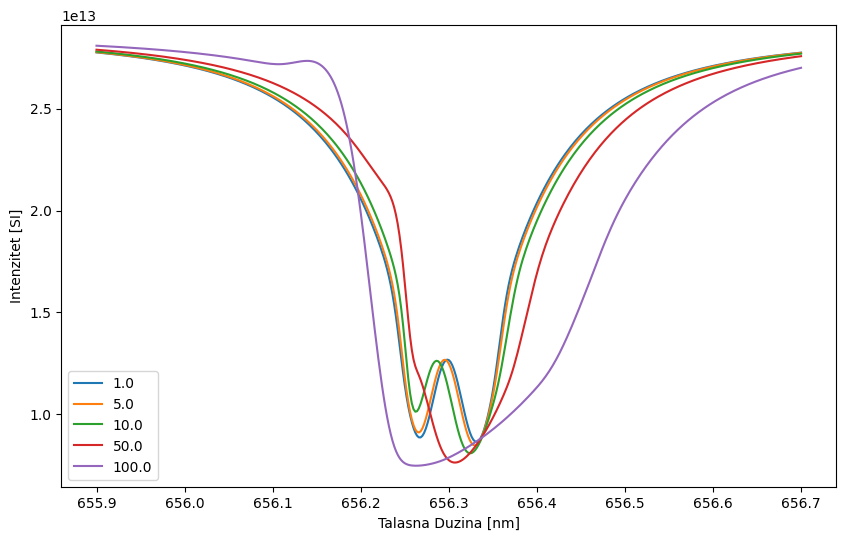

In [66]:
etas = np.ones(len(logtau)) * 1E4
vlos = np.linspace(-1E3,1E3,len(logtau))  # brzina u m/s

plt.figure(figsize=[10,6])


for i in range(0,5):
    
    
    spektar = izracunaj_spektar_vlos(10.**logtau, etas, llambda0, dampings, T, S, vlos, 1.0, llambda)
    
    plt.plot(llambda, spektar, label = str(etascale[i]))
    
    plt.legend()

    vlos *= 3  # povecavamo brzinu da vidimo efekat
        
plt.xlabel("Talasna Duzina [nm]")
plt.ylabel("Intenzitet [SI]")    

### Upgrade ovoga koji bi bio za domaci je da se umesto koristcenja parametrizovanog eta za odredjivanje neprozracnosti u spektralnoj liniji, ta neprozracnost izracuna samo-konzistentno, koraci bi bili sledeci: 

### 1) Odaberete hemijski element i liniju koju hocete. 

### 2) Prvo moramo da nadjemo jonizaciono stanje tog elementa tj da resimo Sahinu jednacinu. Za sada je ok da uzmemo konc e- iz datog modela. To cini Sahinu jednacinu linearnom i jako je lako da se resi. I dovoljno je da resite za taj vas element. Ne zaboravite da morate da procenite ukupnu koncentraciju tog elementa preko njegove zastupljenosti. I da je p = nkT

### 3) Kada to imamo, moramo na neki nacin da zbudzimo particionu funkciju za taj element za svaki temperaturu. Za to cu vam poslati rad Irwina iz 1984, gde samo zamenite polinom koji je on dao.

### 4) Onda samo primenimo Botcmanovu raspodelu.

### 5) Na Nistovom sajtu koji cu vam takodje poslati, mozete naci g-ove a mozete naci i A_ul pa preko njih i B_ul, B_lu

### 6) Kada to imate, izracunate profil linije isto kao gore i iskoristite jednacine sa vezbi da eksplicitno izracunate profil linije. 

### 7) Kraj! Mozete da se igrate razlitim parametrima linije da dobijete neki rezultat.